# Homework 6: Coding

**Due Tuesday November 1st, 11:59pm.**

**This assignment can be done individually or in groups of two.**

**To submit the coding portion of hw6, provide the downloaded .ipynb and .py on Gradescope (One per group and don't forget to add your partner's name).**

In [1]:
"""
Import required libraries.
You should not import any other packages without explicit permission.
"""

import numpy as np
np.set_printoptions(precision=4)
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine, fetch_olivetti_faces, load_breast_cancer,fetch_lfw_people
from sklearn.preprocessing import StandardScaler

# Question 2: Simple PCA

In this assignment, we will implement Principal Component Analysis and perform it on a simple 2-dimensional dataset. One way to perform PCA is by doing an eigenvalue decomposition of a data covariance matrix, which we will implement here.

In [2]:
"""
Load data (Two features from the sklearn Breast Cancer Dataset).
"""

data = load_breast_cancer().data[:, [1, 2]]
X = StandardScaler().fit_transform(data)

## PCA Implementation

First fill out these helper functions. **Please do NOT use np.cov in this section. You may find np.linalg.eig useful.**

In [3]:
def get_cov_mat(X):
    """
    Returns a covariance matrix of the given input matrix.
    You may assume the mean of X on each feature centers at 0.
    
    Args:
        X ((n,p) np.ndarray): The input data
    Returns:
        X_cov ((p,p) np.ndarray): The covariance matrix of the input data
    """  
    
    n, p = X.shape
    
    # <---- Start your code here ----->
    X_cov = (X.T @ X) / (n - 1)
    # <---- End your code here ----->
    
    # confirm the shape of your output
    assert X_cov.shape == (p,p)

    # confirm the result of your output
    assert np.allclose(X_cov, np.cov(X.T))
    
    return X_cov



def get_eig(cov_mat):
    """
    Returns eigenvectors and eigenvalues in sorted order by eigenvalue
    given input covariance matrix.
    
    Args:
        cov_mat ((p,p) np.ndarray): The input covariance matrix
    Returns:
        eig_vals_sorted ((p,) np.ndarray): Eigenvalues in decreasing order
        eig_vecs_sorted ((p,p) np.ndarray): Eigenvectors corresponding to the 
                                            sorted eigenvalues, eig_vecs_sorted[:, i]
                                            corresponds to the ith vector
                                            (i.e. each column is an eigenvector)
    """
    
    p = cov_mat.shape[1]

    # <---- Start your code here ----->
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    sorted_indices = np.argsort(eig_vals)[::-1]
    eig_vals_sorted = eig_vals[sorted_indices]
    eig_vecs_sorted = eig_vecs[:, sorted_indices]
    # <---- End your code here ----->  
    
    # confirm the shapes of your output
    assert eig_vals_sorted.shape == (p,)  
    assert eig_vecs_sorted.shape == (p,p)  
        
    return eig_vals_sorted, eig_vecs_sorted
  
    

def get_projection(X, principal_components):
    """
    Returns the projection of X onto the principal components.
    
    Args:
        X ((n,p) np.ndarray): The input data
        principal_components ((p,p) np.ndarray): Principal components of data
    Returns:
        projection ((n,p) np.ndarray): The projection of X onto the components
    """  

    n, p = X.shape
    
    # <---- Start code here ----->
    projection = X @ principal_components
    # <---- End code here ----->  

    # confirm the shape of your output
    assert projection.shape == (n,p)

    return projection

Next, fill out this main function for PCA using the helper functions above

In [4]:
def pca(X):
    """
    Performs PCA on dataset X. 
    
    Args:
        X ((n,p) np.ndarray): The input Xs, which are in an n (number of samples) 
                              by p (number of features) matrix                 
    
    Returns:
        projection ((n, p) np.ndarray): Samples projected on reduced dimensions
        values ((p,) np.ndarray): Singular Values
        components ((p, p) np.ndarray): Principal Components (also eigenvectors)
    """

    n, p = X.shape

    # <---- Start code here ----->
    X_cov = get_cov_mat(X)
    values, components = get_eig(X_cov)
    projection = get_projection(X, components)
    # <---- End code here ----->

    # confirm the shape of your outputs
    assert projection.shape == (n,p)
    assert values.shape == (p,)
    assert components.shape == (p,p)

    return projection, components, values

### 2.1 Answer on LaTeX

Call your pca function on sample 2-dimensional set, centering X on its mean first. 

**Report the eigenvectors and eigenvalues**, and then also answer the following on LaTeX: **What can you say about the relationship between the first principal component and the second?**

In [5]:
X_mean = np.mean(X, axis=0)
projected, components, values = pca(X - X_mean)
print(components)
print(values)

[[ 0.7071 -0.7071]
 [ 0.7071  0.7071]]
[1.3319 0.6716]


### 2.2 Answer on LaTeX

Plot the given points (with both axes in the same scale) as well as the arrows representing the principal components in original space, with x1 in the x-axis and x2 in the y-axis. The principal component arrows should originate at the mean and have magnitudes equal to their corresponding eigenvalues.

Then, on LaTeX, **attach your plot** and answer the following: **Describe how the principal components relate to the points in terms of variance.**

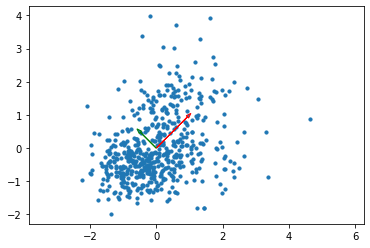

In [6]:
plt.axis('equal')
plt.arrow(X_mean[0], X_mean[1], components[0, 0]*values[0], components[1, 0]*values[0], ec='red', head_width=0.1)
plt.arrow(X_mean[0], X_mean[1], components[0, 1]*values[1], components[1, 1]*values[1], ec='green', head_width=0.1)
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.show()

### 2.3 Answer on LaTeX

Now plot the given points (with both axes in the same scale) in principal component space, with x-axis representing the projection of the first component and the y-axis representing the component on the second. 

On LaTeX, **attach the plot** and then answer the following: **Explain how the graph of points on principal component space relates to the graph of points on the original space above.**

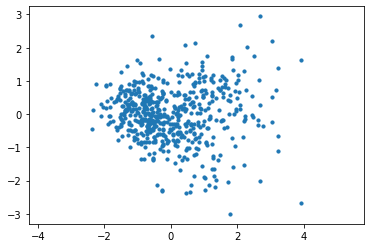

In [7]:
plt.axis('equal')
plt.scatter(projected[:, 0], projected[:, 1], s=10)
plt.show()

# Question 3: Eigenfaces

Now we will perform PCA on images of faces and see how reducing the dimensions of our images affects the images themselves. 

In [8]:
"""
Load data (subset of Labeled Faces in the Wild Dataset). This will take some time to load
"""

faces = fetch_lfw_people()

In [9]:
"""
Preprocess data
"""

n_samples, h, w = faces.images.shape
X_images = faces.data[:400]
y_names = faces.target[:400]
n_features = X_images.shape[1]

print("Total dataset size:")
print("n_samples: %d" % 400)
print("n_features: %d" % n_features)

Total dataset size:
n_samples: 400
n_features: 2914


In [10]:
"""
Help visualising the portraits from the dataset. This may take a minute or two to run.
"""

def plot_portraits(images, titles, h, w, n_row, n_col):
    """
    Plots portraits of images
    
    Args:
        images ((n,p) np.ndarray): The input images in a vector format
        titles (list string): The list of names for each image
        h (int): The input height of the portraits
        w (int): The input width of the portraits
        n_row (int): The number of rows to display of images
        n_col (int): The number of columns to display of images
    """  
    
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

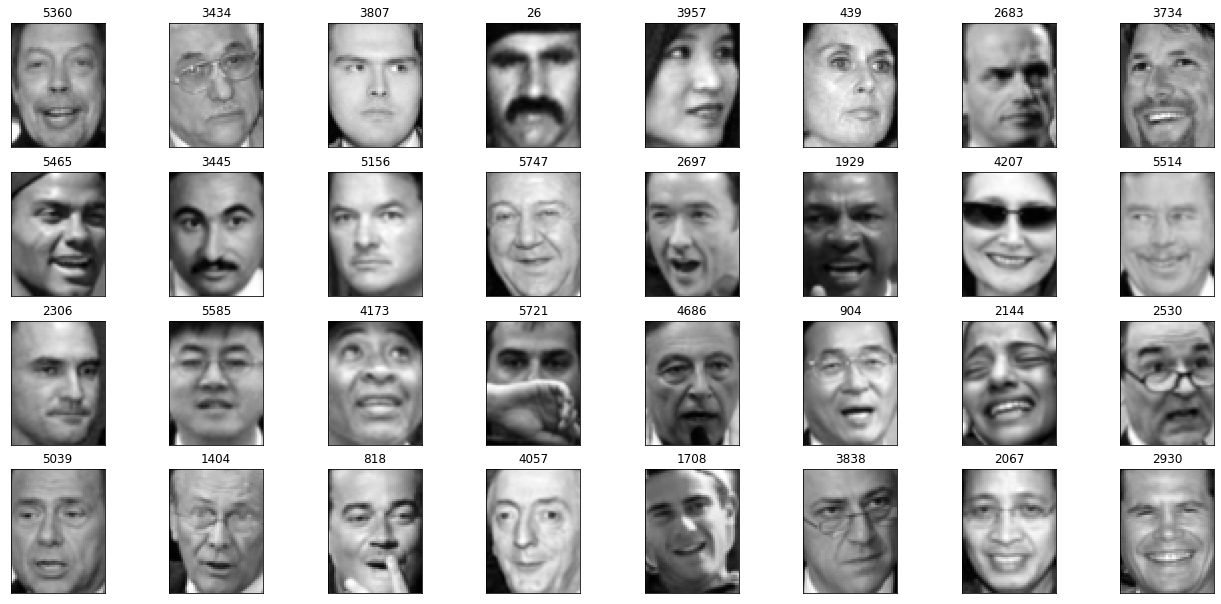

In [11]:
plot_portraits(X_images, y_names, h, w, n_row=4, n_col=8)

## PCA with SVD
PCA can also be implemented using Singular Value Decomposition on the data itself. Implement an alternative form of PCA below using SVD **Please call the np.linalg.svd function for SVD**.

In [12]:
def pca2(X, n_pc):
    """
    Performs PCA on dataset X
    
    Args:
        X ((n,p) np.ndarray): The input Xs, which are in an n (number of samples) 
                              by p (number of features) matrix                 
        n_pc: The number of principal components
    
    Returns:
        projected ((n, min(n, n_pc)) np.ndarray): Samples projected on reduced dimensions
        components ((min(n, n_pc), p) np.ndarray): Principal Components (also eigenvectors)
        values ((min(n, n_pc),) np.ndarray): Singular Values    
        mean ((p,) np.ndarray): Mean of features
        centered_data ((n, p) np.ndarray): Data with the mean subtracted
    """
    
    n, p = X.shape

    # <---- Start code here ----->
    mean = X.mean(axis=0)
    centered_data = X - mean
    _, values, components = np.linalg.svd(centered_data)
    values = values[:min(n, n_pc)]
    components = components[:min(n, n_pc)]
    projected = centered_data @ components.T
    # <---- End code here -----> 
    
    assert projected.shape == (n, min(n, n_pc))
    assert components.shape == (min(n, n_pc), p)
    assert values.shape == (min(n, n_pc),)
    assert mean.shape == (p,)
    assert centered_data.shape == (n, p)

    return projected, components, values, mean, centered_data

Now run the script below that takes the image matrix of n rows by h*w features and runs PCA on this X with 50 components and plot the images of the eigenvectors (which you will have to unwrap back into the image shape). This will take a couple of minutes to run (and may be a little spooky!)

[21298.73   14330.24   13399.524  12115.15    8156.3984]


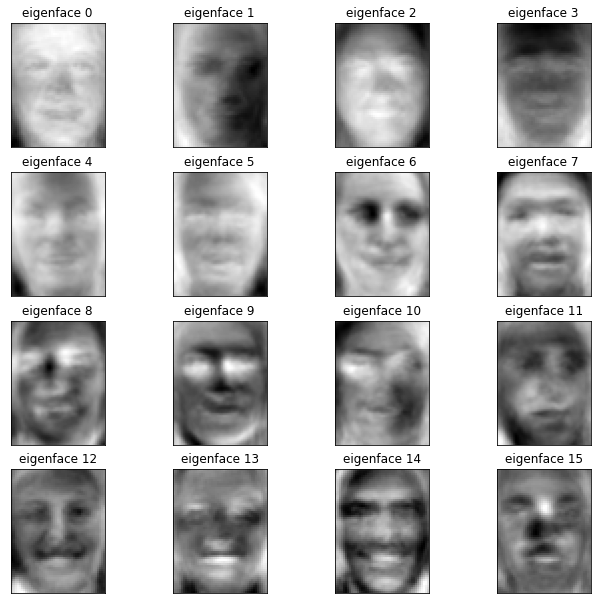

In [13]:
n_components = 50
P, C, V, M, Y = pca2(X_images, n_components)

eigenfaces = C.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w, 4, 4)

# To report your singular values
print(V[:5])

### 3.1 Answer on Latex

**Report the first five singular values and paste the eigenfaces on LaTeX.**

Then, answer the following on LaTeX: **Describe what the eigenfaces look like. What do you expect to observe with the eigenfaces associated with larger eigenvalues?**

## Reconstructing faces
Now implement a function to reconstruct a face given projected data points

In [14]:
def reconstruction(P, C, M, h, w, image_index):
    """
    Reconstructs an image with the given components
    
    Args:
        P, projected ((n, n_pc) np.ndarray): Samples projected on reduced dimensions
        C, components ((n_pc, p) np.ndarray): Principal Components (also eigenvectors)
        M, mean ((p,) np.ndarray): Mean of features
        h (int): The input height of the portraits
        w (int): The input width of the portraits
        image_index (int):  The index of the image in the projected data matrix
        
    Returns:
        recovered_image ((h, w) np.ndarray): Reconstructed image from the inputs
    """    
    
    # <---- Start code here -----> 
    recovered_image = (M + (P[image_index] @ C)).reshape((h, w))
    # <---- End code here -----> 
    
    return recovered_image

Now run the script below to see reconstrcted faces.

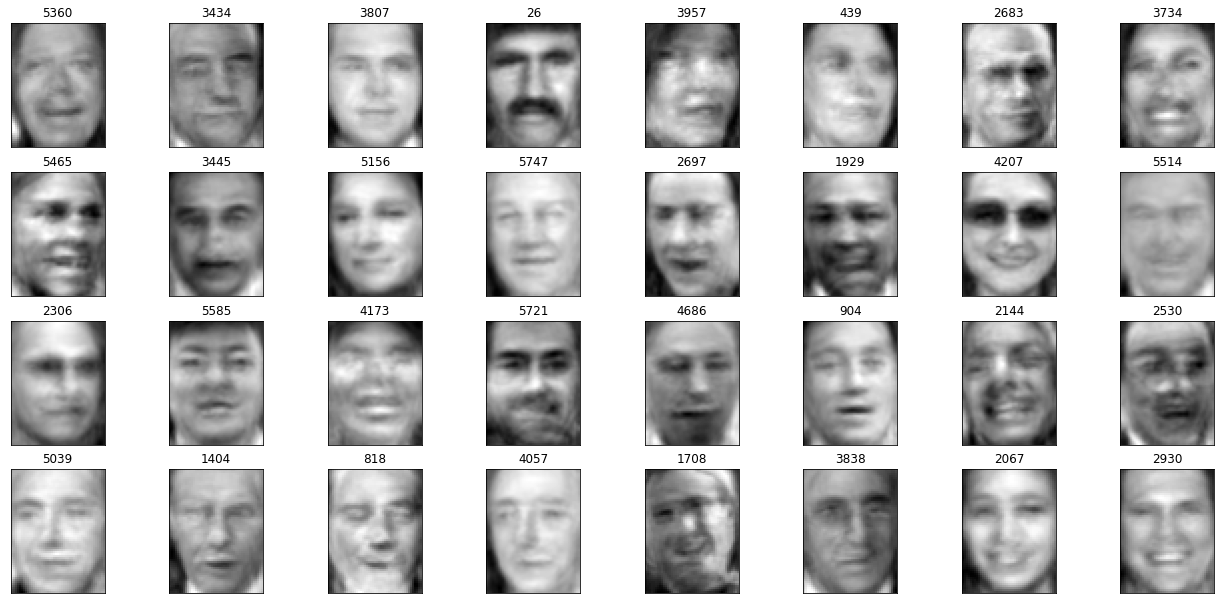

In [15]:
recovered_images = [reconstruction(P, C, M, h, w, i) for i in range(len(X_images))]
plot_portraits(recovered_images, y_names, h, w, n_row=4, n_col=8)

### 3.2 Answer on Latex
**Paste the portrait reconstructions on LaTeX.** Then, also on LaTeX, answer the following questions:



*   **Compare the reconstructed images to the original images. How are they similar and how are they different? Briefly explain why they are different.**
*   **What do you expect to see from the reconstructed images as the number of principal components chosen for PCA increases? Please explain why.**

## Explanation of Variance and Reconstruction Error

Make 3 plots. 
1. One with the reconstruction error over the number of components used. Plot the average of the reconstruction error for the first 50 images over reconstructions with varying number of components, normalized to the range of 0-1.
1. One with the eigenvalues from largest to smallest. 
1. And lastly, one with the cumulative (sum of) eigenvectors used per number of principal components (this is known as explained variance), normalized to the range of 0-1.

In [16]:
P, C, eig_vals, M, Y = pca2(X_images, n_features)

reconst_errors = []
for i in range(X_images.shape[0]):
    dist = 0
    for j in range(50):    
        reconst_img = reconstruction(P[:, :i+1], C[:i+1, :], M, h, w, j)
        dist += np.linalg.norm(np.array(reconst_img).flatten() - np.array(X_images[j]))
    reconst_errors.append(dist/20)

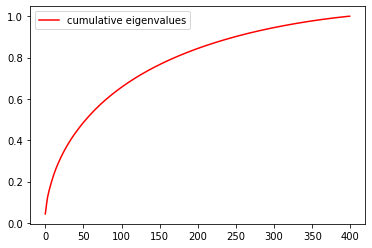

In [17]:
"""
Plot cumulative eigenvalues over the number of components used.
"""

tot = sum(eig_vals)
var_exp = [(i / tot) for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.plot(cum_var_exp, color='red',label="cumulative eigenvalues")
plt.legend()
plt.show()

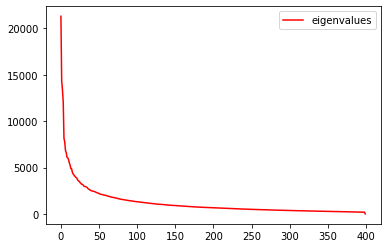

In [18]:
"""
Plot eigenvalues.
"""

plt.plot(eig_vals, color='red',label="eigenvalues")
plt.legend()
plt.show()

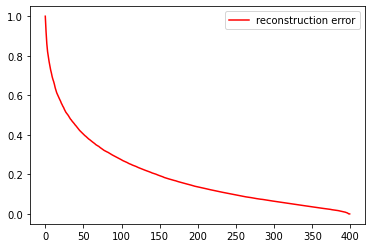

In [19]:
"""
Plot reconstruction error for one image normalized.
"""

plt.plot(reconst_errors/reconst_errors[0], color='red',label="reconstruction error")
plt.legend()
plt.show()

### 3.3 Answer on Latex

**Paste the graphs into LaTeX.** Then, also on LaTeX, answer the following:


*   **How do you expect (in theory) the plot of variance explained as the number of components to relate to the eigenvalues of the corresponding components?**
*   **What is the relation between reconstruction error and the variance explained?**



# Turning it in

To submit the coding portion of hw6, download the .ipynb and .py versions of Colab notebook and submit them to Gradescope (One per group and don't forget to add your partner's name).